<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/q2ml1401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

علیرضا خالقی آناقیزی 
99101462

سوال 2

در قسمت زیر فایل های مورد نظر را در گوگل درایو ذخیره کردیم و سپسفایل های مورد نظر را لود کرده و دیتا های 
موجود را به ترتیب در ماتریس های 

SVT 

ذخیره کردیم.

In [1]:
import csv 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
filename1='/content/drive/MyDrive/ml/test_data.npy' 
filename2='/content/drive/MyDrive/ml/train_data.npy' 
filename3='/content/drive/MyDrive/ml/validation_data.npy' 


Mounted at /content/drive


In [14]:
T = np.load(filename1, mmap_mode='r')
S = np.load(filename2, mmap_mode='r')
V = np.load(filename3, mmap_mode='r')
#print(T)
print(str(len(T))+'\n')
#print(S)
print(str(len(S))+'\n')
#print(V)
print(str(len(V))+'\n')

40

30

40



حال با توجه به این که در حالت کلی میخواهیم یک ترکیب غیر خطی برای هر یک از متغییر ها بر اساس ورودی هایش بچینیم باید در رابطه ماتریسی موجود برای رگرسیون خطی ما یک 

ψn(X)=[ψ1n(x),ψ2n(x), ...]  =>  
ψ1n(x)=[x1,..,x1ⁿ]ᵀ  

In [3]:
def spiFunctionN(n,dataset) :
  tra= np.array(dataset).T
  xi=tra[0]
  xi=np.array(xi,dtype=float)
  spi=[]
  for i in xi:
    xin=[]
    for j in range(n):
      xin.append(pow(i,j))
    xin=np.array(xin).T
    xin=np.array(xin,dtype=float)  
    spi.append(xin)
  spi=np.array(spi).T
  spi=np.array(spi,dtype=float) 
  return spi


در بالا تابعی نوشتیم که با گرفتن عدد n  ماتریس سای مورد نظر را در خروجی میدهی.

داده های مساله را داخل یک لیست قرار میدهیم تا با استفاده از رابطه ماتریسی ضرایب مورد نظر را به دست آوریم

A=ψ*ψT
B=ψ*y
w*=invers(A)*B

In [4]:
tra= np.array(S).T
yS=tra[1]
yS=np.array(yS,dtype=float)

def WofN(y,x):
  xt=np.array(x).T
  xt=np.array(xt,dtype=float)
  A=np.dot(x,xt)
  B=np.dot(x,y)
  w=np.dot(np.linalg.inv(A),B)
  print("w"+str(len(x)))
  print(w)
  return(w)

def calLsn(w,y,x):
  M=(len(x[0]))
  h=np.dot(w,x)
  sum=0
  max=0
  for i in range(M):
    sum=sum+pow((h[i]-y[i]),2)
    if(pow((h[i]-y[i]),2)>max):
      max=pow((h[i]-y[i]),2)
  L=sum/M 
  print("L"+str(len(x)))
  print(L) 
  print("max"+str(len(x)))
  print(max)
  return (L)
 

در باالا توابع مورد نظر برای محاسبه ضرایب و سپس با استفاده از ضرایب مقدار خطای محاسبه شده برای هر کدام از  درجه های مورد نظر به دست می آوریم

In [5]:
Ln=[]
for i in range(15):
  spi=spiFunctionN(i+1,S)
  w=WofN(yS,spi)
  li=calLsn(w,yS,spi)
  Ln.append(li)
print(Ln)  


w1
[0.29137662]
L1
0.7979479867850431
max1
7.733590754728554
w2
[ 0.3028272  -0.17115968]
L2
0.7618038655184619
max2
9.46172686931678
w3
[-0.47153391  0.02303306  0.61487693]
L3
0.25136046057337025
max3
2.3432089080028113
w4
[-0.44772657 -0.21431613  0.63302358  0.09907814]
L4
0.2405669239187683
max4
1.7025126525945165
w5
[-0.13999917 -0.28076096 -0.30608827  0.17859025  0.29402467]
L5
0.14807869905653698
max5
0.660694906977806
w6
[-0.14467118  0.28887691 -0.48285907 -0.52448461  0.37396026  0.17091315]
L6
0.12273473144420241
max6
0.8059519880494683
w7
[-0.32165221  0.21470849  0.79148165 -0.65529921 -0.67297717  0.23686129
  0.20954853]
L7
0.08872308853571916
max7
0.43934321926410524
w8
[-0.32123719  0.20067219  0.79125773 -0.61887301 -0.67492274  0.21489276
  0.21033192  0.00370995]
L8
0.08871246906527389
max8
0.4434734590429635
w9
[-0.57681491  0.45232021  3.65340331 -1.78466323 -4.91506455  1.06287354
  2.19631879 -0.15970799 -0.29020886]
L9
0.044821130927609615
max9
0.233563688205

رسم نمودار

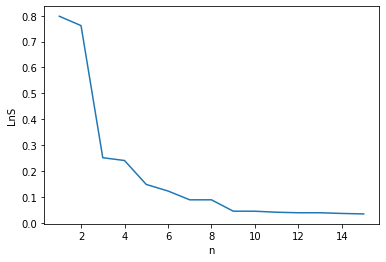

In [6]:
import matplotlib.pyplot as plt
xaxis=[]
for i in range(15):
  xaxis.append(i+1)
xpoints = np.array(xaxis)
ypoints = np.array(Ln)
plt.xlabel("n")
plt.ylabel("LnS")
plt.plot(xpoints, ypoints)
plt.show()

(ب

دلیل اینکه ما مقایسه  

n 

و 

Ls

مقایسه خوبی برای چند جمله ای نیست به این خاطر است که ما با پدیده 

overfitting

مواجه میشویم و در این صورت با زیاد کردن درجه های ما یادگیری به گونه ای میشود که برای داده های تمرینی خطا صفر میشود ولی خطای واقعی ما بسیار زیاد میشود.

حال مقدار خطا یعنی همان مراحل قبل را برای دیتا های 

V 

به دست میآوریم



w1
[0.29137662]
L1
1.006534268952748
max1
9.541411197081137
w2
[ 0.3028272  -0.17115968]
L2
1.1011413142097335
max2
11.524164371207252
w3
[-0.47153391  0.02303306  0.61487693]
L3
0.5175189063457092
max3
2.878292882919742
w4
[-0.44772657 -0.21431613  0.63302358  0.09907814]
L4
0.43354163915594957
max4
2.212061255439961
w5
[-0.13999917 -0.28076096 -0.30608827  0.17859025  0.29402467]
L5
0.3726737456923642
max5
2.3932518386872546
w6
[-0.14467118  0.28887691 -0.48285907 -0.52448461  0.37396026  0.17091315]
L6
0.5034182124315996
max6
7.4204516371118725
w7
[-0.32165221  0.21470849  0.79148165 -0.65529921 -0.67297717  0.23686129
  0.20954853]
L7
0.6973543705870306
max7
20.123236196188188
w8
[-0.32123719  0.20067219  0.79125773 -0.61887301 -0.67492274  0.21489276
  0.21033192  0.00370995]
L8
0.7067265534631364
max8
20.435744608012108
w9
[-0.57681491  0.45232021  3.65340331 -1.78466323 -4.91506455  1.06287354
  2.19631879 -0.15970799 -0.29020886]
L9
0.11129319168843814
max9
0.8459479054242776
w

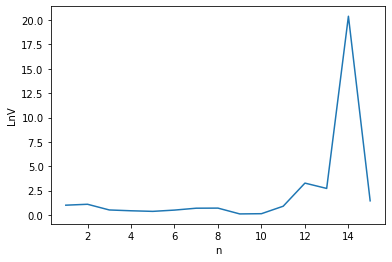

In [19]:
tra= np.array(V).T
yV=tra[1]
yV=np.array(yV,dtype=float)
Ln=[]
for i in range(15):
  spi=spiFunctionN(i+1,S)
  w=WofN(yS,spi)
  spi2=spiFunctionN(i+1,V)
  li=calLsn(w,yV,spi2)
  Ln.append(li)
print(Ln)
import matplotlib.pyplot as plt
xaxis=[]
for i in range(15):
  xaxis.append(i+1)
xpoints = np.array(xaxis)
ypoints = np.array(Ln)
plt.xlabel("n")
plt.ylabel("LnV")
plt.plot(xpoints, ypoints)
plt.show()

(ج

با توجه به نمودار های بالا که در هردو ابتدا با بیشتر شدن درجه چند جمله ای ها مقدار خطا کمتر شده است ولی در یک درجه وسطی مقدار داده های ولیدیشن کمینه شده و از آن جا به بعد مقدار خطای ما بسیار زیاد شده است و این همان دلیل اور فیتینگ میباشد یعنی در درجه های بیشتر لزوما مقدار خطای ما زیاد تر نشده است.

(د

با توجه به این که مقدار خطا در هر دو نمودار به ازای درجه 9  در کمترین مقدار میباشد پس درجه 9 انتخاب میکنیم .
هردو نمودار میتوانند مورد بررسی قرار بگیرند چون در نمودار اولی نیز از درجه 9 به بعد خطای ما تقریبا ثابت مانده است ولی در نمودار 

VT

به صورت کاملا واضح میبینیم که در درجه 9 کمینه خطا را داریم در و در درجه های دیگر خطای ما بیشتر میباشد.

پس ما نمودار 

V

را مورد قیاس برای درجه بندی مان در نظر میگیریم.



(ه

حالا باید همان مراحل را برای دیتا تست انجام دهیم فقط درجه 9 ام را مورد بررسی قرار میدهیم.

In [23]:
tra= np.array(T).T
yT=tra[1]
yT=np.array(yT,dtype=float)
print(len(yT))
spi=spiFunctionN(9,S)
w=WofN(yS,spi)
spi2=spiFunctionN(9,T)
LnT=calLsn(w,yT,spi2)
print("LNT="+str(LnT))


40
w9
[-0.57681491  0.45232021  3.65340331 -1.78466323 -4.91506455  1.06287354
  2.19631879 -0.15970799 -0.29020886]
L9
0.11791424797228751
max9
0.4893690666504728
LNT=0.11791424797228751


در بالا دیدیم مقدار خطا برابر 0.35 میباشد که این همان تخمین با استفاده از دیتا های تست است

w1
[0.29137662]
L1
0.6479725528453107
max1
8.929540294527085
w2
[ 0.3028272  -0.17115968]
L2
0.6856204094212919
max2
10.898129752354453
w3
[-0.47153391  0.02303306  0.61487693]
L3
0.47361912092035335
max3
3.047655057362335
w4
[-0.44772657 -0.21431613  0.63302358  0.09907814]
L4
0.42071807556775853
max4
2.925661134266275
w5
[-0.13999917 -0.28076096 -0.30608827  0.17859025  0.29402467]
L5
0.33017199670572595
max5
1.8519902565075634
w6
[-0.14467118  0.28887691 -0.48285907 -0.52448461  0.37396026  0.17091315]
L6
0.3533737119564516
max6
1.4484390401429184
w7
[-0.32165221  0.21470849  0.79148165 -0.65529921 -0.67297717  0.23686129
  0.20954853]
L7
0.30390750247196574
max7
4.064902372393891
w8
[-0.32123719  0.20067219  0.79125773 -0.61887301 -0.67492274  0.21489276
  0.21033192  0.00370995]
L8
0.3071902244605096
max8
4.149745524175987
w9
[-0.57681491  0.45232021  3.65340331 -1.78466323 -4.91506455  1.06287354
  2.19631879 -0.15970799 -0.29020886]
L9
0.11791424797228751
max9
0.4893690666504728

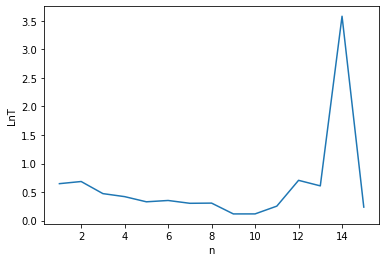

In [24]:
Ln=[]
for i in range(15):
  spi=spiFunctionN(i+1,S)
  w=WofN(yS,spi)
  spi2=spiFunctionN(i+1,T)
  li=calLsn(w,yT,spi2)
  Ln.append(li)
print(Ln)
import matplotlib.pyplot as plt
xaxis=[]
for i in range(15):
  xaxis.append(i+1)
xpoints = np.array(xaxis)
ypoints = np.array(Ln)
plt.xlabel("n")
plt.ylabel("LnT")
plt.plot(xpoints, ypoints)
plt.show()

در بالا نیز باز هم برای مقادیر مختلف درجات مقدار خطای تست را اندازه گیری کردیم که خطای واقعی برای درجه 9 کمینه مقدارش را دارد

(و

در حالت کلی ما بعد از استفاده از داده های تمرین نیاز داریم تا ببینیم چه ضرایبی مورد پسند میباشند و عملکرد مناسب تری دارند در نتیجه یک سری دیتا هایی را میگیریم و آن ها را استفاده میکنیم تا بتوانیم ببینیم عملکرد مدل های به دست آمده روی دیتا های جدید به چه گونه است .
سپس با توجه به عمل کرد مدل ها روی دیتا ها یک مدل را به عنوان بهترین مدل به دست می آوریم .
سپس برای مدلی که به دست آوردیم باید یک سری دیتا های جدید به دست آوریم و روی آن خطای مدل را اندازه گیری میکنیم 
در واقع دیتا های ولیدیشن برای به دست آوردن بهترین مدل استفاده میشود ولی نمیتوان دیگر از آن برای حساب خطای مدل استفاده کنیم.